In [1]:
import jieba
import re
import copy

from sklearn.preprocessing import LabelEncoder
import numpy as np
from collections import OrderedDict

In [6]:
with open('data/hongloumeng.txt') as f:
    i = 0
    for line in f:
        print line
        i += 1
        if i >10:
            break

《红楼梦》曹雪芹



严正声明：本书为丫丫小说网(www.shuyaya.com)的用户上传至其在本站的存储空间，本站只提供TXT全集电子书存储服务以及免费下载服务，以下作品内容之版权与本站无任何关系。

在线阅读：http://www.shuyaya.com/read/2034/

--------------------------------------------------



第一回  甄士隐梦幻识通灵　贾雨村风尘怀闺秀



    		



    此开卷第一回也．作者自云：因曾历过一番梦幻之后，故将真事隐去，而借"通灵"之说，撰此《石头记》一书也．故曰"甄士隐"云云．但书中所记何事何人？自又云：“今风尘碌碌，一事无成，忽念及当日所有之女子，一一细考较去，觉其行止见识，皆出于我之上．何我堂堂须眉，诚不若彼裙钗哉？实愧则有余，悔又无益之大无可如何之日也！当此，则自欲将已往所赖天恩祖德，锦衣纨绔之时，饫甘餍肥之日，背父兄教育之恩，负师友规谈之德，以至今日一技无成，半生潦倒之罪，编述一集，以告天下人：我之罪固不免，然闺阁中本自历历有人，万不可因我之不肖，自护己短，一并使其泯灭也．虽今日之茅椽蓬牖，瓦灶绳床，其晨夕风露，阶柳庭花，亦未有妨我之襟怀笔墨者．虽我未学，下笔无文，又何妨用假语村言，敷演出一段故事来，亦可使闺阁昭传，复可悦世之目，破人愁闷，不亦宜乎？"故曰"贾雨村"云云．



## 提取句子

In [9]:
def cut_sentence(text):
    text = (text).decode('utf-8')
    start = 0
    i = 0
    sentences = []
    punt_list = '.!?~． 。！？～\n'.decode('utf-8')
    for word in text:
        if word in punt_list and token not in punt_list:
            sentences.append(text[start:i+1])
            start = i+1
            i +=1
        else:
            i +=1
            token = list(text[start:i+2]).pop()
    if start < len(text):
        sentences.append(text[start:])
    return sentences

In [18]:
f = open('data/hongloumeng.txt', 'r')
context = f.read()
sentences = cut_sentence(context)
f.close()

In [12]:
for s in senteces[:20]:
    print s

《红楼梦》曹雪芹


严正声明：本书为丫丫小说网(www.
shuyaya.
com)的用户上传至其在本站的存储空间，本站只提供TXT全集电子书存储服务以及免费下载服务，以下作品内容之版权与本站无任何关系。

在线阅读：http://www.
shuyaya.
com/read/2034/

--------------------------------------------------


第一回  
甄士隐梦幻识通灵　贾雨村风尘怀闺秀

    
		

    
此开卷第一回也．
作者自云：因曾历过一番梦幻之后，故将真事隐去，而借"通灵"之说，撰此《石头记》一书也．
故曰"甄士隐"云云．
但书中所记何事何人？
自又云：“今风尘碌碌，一事无成，忽念及当日所有之女子，一一细考较去，觉其行止见识，皆出于我之上．
何我堂堂须眉，诚不若彼裙钗哉？
实愧则有余，悔又无益之大无可如何之日也！
当此，则自欲将已往所赖天恩祖德，锦衣纨绔之时，饫甘餍肥之日，背父兄教育之恩，负师友规谈之德，以至今日一技无成，半生潦倒之罪，编述一集，以告天下人：我之罪固不免，然闺阁中本自历历有人，万不可因我之不肖，自护己短，一并使其泯灭也．
虽今日之茅椽蓬牖，瓦灶绳床，其晨夕风露，阶柳庭花，亦未有妨我之襟怀笔墨者．


In [13]:
filter_re = re.compile(u'[^\u4E00-\u9FA5]')

In [19]:
f = open('data/cleaned_hongloumeng.txt', 'w')
for s in sentences:
    cleaned_s = filter_re.sub(r'', s)
    if len(cleaned_s):
        f.write(cleaned_s.encode('utf-8')+'\n')
f.close()

### 语言模型

In [20]:
cleaned_sentences = []
for s in sentences:
    cleaned_s = filter_re.sub(r'', s)
    if len(cleaned_s) :
        cleaned_sentences.append(cleaned_s)

[u'\u7ea2\u697c\u68a6\u66f9\u96ea\u82b9',
 u'\u4e25\u6b63\u58f0\u660e\u672c\u4e66\u4e3a\u4e2b\u4e2b\u5c0f\u8bf4\u7f51',
 u'\u7684\u7528\u6237\u4e0a\u4f20\u81f3\u5176\u5728\u672c\u7ad9\u7684\u5b58\u50a8\u7a7a\u95f4\u672c\u7ad9\u53ea\u63d0\u4f9b\u5168\u96c6\u7535\u5b50\u4e66\u5b58\u50a8\u670d\u52a1\u4ee5\u53ca\u514d\u8d39\u4e0b\u8f7d\u670d\u52a1\u4ee5\u4e0b\u4f5c\u54c1\u5185\u5bb9\u4e4b\u7248\u6743\u4e0e\u672c\u7ad9\u65e0\u4efb\u4f55\u5173\u7cfb',
 u'\u5728\u7ebf\u9605\u8bfb',
 u'\u7b2c\u4e00\u56de',
 u'\u7504\u58eb\u9690\u68a6\u5e7b\u8bc6\u901a\u7075\u8d3e\u96e8\u6751\u98ce\u5c18\u6000\u95fa\u79c0',
 u'\u6b64\u5f00\u5377\u7b2c\u4e00\u56de\u4e5f',
 u'\u4f5c\u8005\u81ea\u4e91\u56e0\u66fe\u5386\u8fc7\u4e00\u756a\u68a6\u5e7b\u4e4b\u540e\u6545\u5c06\u771f\u4e8b\u9690\u53bb\u800c\u501f\u901a\u7075\u4e4b\u8bf4\u64b0\u6b64\u77f3\u5934\u8bb0\u4e00\u4e66\u4e5f',
 u'\u6545\u66f0\u7504\u58eb\u9690\u4e91\u4e91',
 u'\u4f46\u4e66\u4e2d\u6240\u8bb0\u4f55\u4e8b\u4f55\u4eba']

In [23]:
for s in jieba.cut("自又云今风尘碌碌一事无成忽念及当日所有之女子一一细考较去觉其行止见识皆出于我之上"):
    print s

Building prefix dict from the default dictionary ...
Dumping model to file cache c:\users\mefly\appdata\local\temp\jieba.cache
Loading model cost 2.818 seconds.
Prefix dict has been built succesfully.


自
又
云今
风尘碌碌
一事无成
忽
念及
当日
所有
之
女子
一一
细考
较
去
觉
其
行止
见识
皆
出于
我
之上


In [29]:
cut_sentences = [list(jieba.cut(s)) for s in cleaned_sentences]

In [25]:
generate_ngrams = lambda sentence, n : zip(*[sentence[i:] for i in range(n)])

In [26]:
# test generate_ngrams function
for bigram in generate_ngrams(list(jieba.cut(cleaned_sentences[10])), 2):
    print bigram[0], bigram[1]
for unigram in generate_ngrams(list(jieba.cut(cleaned_sentences[10])), 1):
    print unigram[0]

自 又
又 云今
云今 风尘碌碌
风尘碌碌 一事无成
一事无成 忽
忽 念及
念及 当日
当日 所有
所有 之
之 女子
女子 一一
一一 细考
细考 较
较 去
去 觉
觉 其
其 行止
行止 见识
见识 皆
皆 出于
出于 我
我 之上
自
又
云今
风尘碌碌
一事无成
忽
念及
当日
所有
之
女子
一一
细考
较
去
觉
其
行止
见识
皆
出于
我
之上


In [27]:
# maximum likelihood parameter estimation 
def ngrams_parameter_estimate(sentences, n):
    sentences_copy = copy.deepcopy(sentences)
    ngrams_dict = {}
    num_ngrams = 0
    for words in sentences_copy:
        for i in range(n-1):
            words.insert(0, '*')
        words.append('#')
        ngrams = generate_ngrams(words, n)
        for ngram in ngrams:
            ngrams_dict[ngram] = ngrams_dict.get(ngram, 0.0) + 1.0
            num_ngrams += 1
    
    # normalize
    #for ngram in ngrams_dict:
        #ngrams_dict[ngram] /= num_ngrams
        
    return ngrams_dict, num_ngrams

In [30]:
unigrams_dict, n_bigrams = ngrams_parameter_estimate(cut_sentences, 1)
filtered_unigrams_dict = OrderedDict(sorted([(k, v)  for k, v in unigrams_dict.iteritems() if v >= 10], key = lambda (k, v) : (v, k), reverse=True))

In [31]:
print 'word: %s, frequency: %s' % (filtered_unigrams_dict.keys()[0][0], filtered_unigrams_dict[filtered_unigrams_dict.keys()[0]])
print 'word: %s, frequency: %s' % (filtered_unigrams_dict.keys()[1][0], filtered_unigrams_dict[filtered_unigrams_dict.keys()[1]])
print 'word: %s, frequency: %s' % (filtered_unigrams_dict.keys()[200][0], filtered_unigrams_dict[filtered_unigrams_dict.keys()[200]])
print 'word: %s, frequency: %s' % (filtered_unigrams_dict.keys()[-1][0], filtered_unigrams_dict[filtered_unigrams_dict.keys()[-1]])

word: #, frequency: 34412.0
word: 了, frequency: 19613.0
word: 今儿, frequency: 286.0
word: 一刻, frequency: 10.0


In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Text(0,0.5,'frequency')

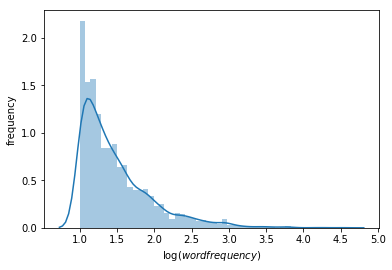

In [35]:
ax = sns.distplot(np.log10(filtered_unigrams_dict.values()))
ax.set_xlabel(r'$\log(word frequency)$')
ax.set_ylabel(r'frequency')

## Split Data into Train, Valid, Test

In [36]:
n_samples = len(cut_sentences)
n_valid = int(n_samples * 0.2)
n_test = int(n_samples * 0.3)

In [37]:
permutation = np.random.permutation(n_samples)

In [38]:
shuffled_sentences = np.array(cut_sentences)[permutation]

In [39]:
train = shuffled_sentences[:n_samples-n_test-n_valid]
valid = shuffled_sentences[n_samples-n_test-n_valid:n_samples-n_test]
test = shuffled_sentences[n_samples-n_test:]

### Build Language Model on Train

In [40]:
unigram_dict, n_unigrams = ngrams_parameter_estimate(train, 1)
bigrams_dict, n_bigrams = ngrams_parameter_estimate(train, 2)
trigrams_dict, n_trigrams = ngrams_parameter_estimate(train, 3)

### Test Our Uni-, Bi-, Tri-gram Model on Test

In [41]:
def calculate_sentence_log_probability(sentence, n, num_grams, ngrams_dict, n_1grams_dict=None):
    assert len(ngrams_dict.keys()[0]) == n, n
    if n_1grams_dict is None:
        assert n == 1
    ngrams = generate_ngrams(sentence, n)
    log_prob, has_unknown_ngram = 0.0, False
    for ngram in ngrams:
        if ngram in ngrams_dict:
            if n == 1:
                log_prob += np.log2(ngrams_dict[ngram]/num_grams)
            else:
                log_prob += np.log2(ngrams_dict[ngram]/n_1grams_dict[ngram[:n-1]])
        else:
            has_unknown_ngram = True
    return 0.0 if has_unknown_ngram else log_prob

In [42]:
def compute_total_words(sentences):
    
    return np.sum([len(s) for s in sentences])

In [43]:
n_words_in_test = compute_total_words(test)

In [44]:
n_words_in_test

134443

In [45]:
ngrams_list = [unigram_dict, bigrams_dict, trigrams_dict]
ngrams_names = ['uni', 'bi', 'tri']
print "Number of words in test: {}".format(n_words_in_test)
for n in range(1, 4):
    sum_log_prob = 0.0
    for s in test:
        if n == 1:
            sum_log_prob += calculate_sentence_log_probability(s, n, n_unigrams, ngrams_list[n-1])
        else:
            sum_log_prob += calculate_sentence_log_probability(s, n, n_unigrams, ngrams_list[n-1], ngrams_list[n-2])
    perplexity = 2**(-sum_log_prob/n_words_in_test)
    
    print "Perplexity for {} gram language model: {}".format(ngrams_names[n-1], perplexity)

Number of words in test: 134443
Perplexity for uni gram language model: 14.9899421316
Perplexity for bi gram language model: 1.08565685362
Perplexity for tri gram language model: 1.00741697138


In [48]:
n_words_in_valid = compute_total_words(valid)
print "Number of words in valid: {}".format(n_words_in_valid)
for n in range(1, 4):
    sum_log_prob = 0.0
    for s in valid:
        if n == 1:
            sum_log_prob += calculate_sentence_log_probability(s, n, n_unigrams, ngrams_list[n-1])
        else:
            sum_log_prob += calculate_sentence_log_probability(s, n, n_unigrams, ngrams_list[n-1], ngrams_list[n-2])
    perplexity = 2**(-sum_log_prob/n_words_in_valid)
    
    print "Perplexity for {} gram language model: {}".format(ngrams_names[n-1], perplexity)

Number of words in valid: 90255
Perplexity for uni gram language model: 15.3983164967
Perplexity for bi gram language model: 1.08717603287
Perplexity for tri gram language model: 1.00737080073


### Linear Interpolation Smoothing

In [49]:
lambda_1 = 0.2#lambda for unigram
lambda_2 = 0.3#lambda for bigram
lambda_3 = 0.5#lambda for trigram

In [52]:
def sentence_log_probability_with_linear_interpolation(sentence, num_grams, ngrams_list, lambdas):
    ngrams = generate_ngrams(sentence, 3)
    log_prob, has_unknown_ngram = 0.0, False
    for ngram in ngrams:
        if ngram in ngrams_list[2]:
            prob = 0.0
            for i in range(3):
                if i == 0:
                    prob += ngrams_list[i][ngram[:i+1]]*lambdas[i]/num_grams
                else:
                    prob += ngrams_list[i][ngram[:i+1]]*lambdas[i]/ngrams_list[i-1][ngram[:i]]
            log_prob += np.log2(prob) if prob > 0.0 else 0.0
        else:
            has_unknown_ngram = True
    return 0.0 if has_unknown_ngram else log_prob

In [53]:
n_words_in_valid = compute_total_words(valid)
lambdas = [lambda_1, lambda_2, lambda_3]
print "Number of words in valid: {}".format(n_words_in_valid)
sum_log_prob = 0.0
for s in valid:
    sum_log_prob += sentence_log_probability_with_linear_interpolation(s, n_unigrams, ngrams_list, lambdas)
perplexity = 2**(-sum_log_prob/n_words_in_valid)
    
print "Perplexity for smoothed trigram language model: {}".format(perplexity)

Number of words in valid: 90255
Perplexity for smoothed trigram language model: 1.00830438637


In [50]:
def random_search_lambdas(sentences, n_iter, n_unigrams, ngrams_list, verbose=True):
    best_lambda_1, best_lambda_2, best_lambda_3 = None, None, None
    best_log_prob = -np.inf
    for i in range(n_iter):
        lambda_1 = np.random.uniform(0, 1)
        lambda_2 = np.random.uniform(0, 1)
        lambda_3 = 1.0 - lambda_1 - lambda_2
        lambdas = [lambda_1, lambda_2, lambda_3]
        sum_log_prob = 0.0
        for s in valid:
            sum_log_prob += sentence_log_probability_with_linear_interpolation(s, n_unigrams, ngrams_list, lambdas)
        if sum_log_prob > best_log_prob:
            best_log_prob = sum_log_prob
            best_lambda_1, best_lambda_2, best_lambda_3 = tuple(lambdas)
        if verbose:
            print "current best log_prob: {}".format(best_log_prob)
            
    return [best_lambda_1, best_lambda_2, best_lambda_3]

In [54]:
best_lambdas = random_search_lambdas(valid, 10, n_unigrams, ngrams_list)

current best log_prob: -582.086646696
current best log_prob: -582.086646696
current best log_prob: -582.086646696
current best log_prob: -582.086646696
current best log_prob: -582.086646696
current best log_prob: -574.619657516
current best log_prob: -574.619657516
current best log_prob: -574.619657516
current best log_prob: -574.619657516
current best log_prob: -574.619657516


In [55]:
best_lambdas

[0.8863844098841657, 0.8442448614404383, -0.730629271324604]

In [56]:
n_words_in_test = compute_total_words(test)
print "Number of words in test: {}".format(n_words_in_test)
sum_log_prob = 0.0
for s in test:
    sum_log_prob += sentence_log_probability_with_linear_interpolation(s, n_unigrams, ngrams_list, best_lambdas)
perplexity = 2**(-sum_log_prob/n_words_in_test)
    
print "Perplexity for smoothed trigram language model: {}".format(perplexity)

Number of words in test: 134443
Perplexity for smoothed trigram language model: 1.00433712579


# 隐马尔可夫过程

In [64]:
from sklearn.preprocessing import LabelEncoder

In [65]:
sentence = ['我', '是', '中国人']
emission_prob = {
    ('N', '我'): 0.01,
    ('N', '中国人'): 0.002,
    ('V', '是'): 0.05
}
transition_prob = {
    ('*', 'N'): 0.02,
    ('*', 'V'): 0.0009,
    ('N', 'V'): 0.05,
    ('V', 'N'): 0.04
}

In [66]:
n_taggers = 2
tagger_encoder = LabelEncoder()
encoded_taggers = tagger_encoder.fit_transform(['N', 'V'])

In [67]:
encoded_taggers

array([0, 1], dtype=int64)

In [4]:
dynamic_table = np.ones([n_taggers, len(sentence)], dtype=np.float32)*(-1)
for j in range(n_taggers):
    tagger_to_tagger = ('*', tagger_encoder.inverse_transform(j))
    word_on_tagger = (tagger_encoder.inverse_transform(j), sentence[0])
    dynamic_table[j, 0] = transition_prob.get(tagger_to_tagger,0.0)*emission_prob.get(word_on_tagger,0.0)
for i in range(1, len(sentence)):
    for j in range(n_taggers):
        word_on_tagger = (tagger_encoder.inverse_transform(j),sentence[i])
        max_at_i = 0.0
        # loop all states in previous step
        for k in range(n_taggers):
            tagger_to_tagger = (tagger_encoder.inverse_transform(k),tagger_encoder.inverse_transform(j))
            prob_k_j = dynamic_table[k, i-1]*transition_prob.get(tagger_to_tagger,0.0)
            if max_at_i < prob_k_j:
                max_at_i = prob_k_j
        dynamic_table[j, i] = max_at_i
        tmp = dynamic_table[j, i]
        dynamic_table[j, i] = dynamic_table[j, i]*emission_prob.get(word_on_tagger, 0.0)

back_pointer = np.ones((len(sentence, )), dtype=np.int32)*(-1)
for i in range(len(sentence) - 1, -1, -1):
    max_at_i = 0.0
    max_j = 0.0
    for j in range(n_taggers):
        if dynamic_table[j, i] > max_at_i:
            max_at_i = dynamic_table[j, i]
            max_j = j
            back_pointer[i] = j

NameError: name 'np' is not defined

## Use nltk to build Hidden Markov Model

In [5]:
import nltk
from nltk.corpus import treebank
from nltk.tag import hmm

In [8]:
# train_data = treebank.tagged_sents()

# print train_data[0]

In [7]:
trainer = hmm.HiddenMarkovModelTrainer()
tagger = trainer.train_supervised(train_data)

NameError: name 'train_data' is not defined